# Implementation: Parallel Tempering

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
from parallel_tempering import energy, f

#### Running the code for a given number of chains and epochs

In [35]:
num_chains = 4
num_epochs = 10000

In [36]:
! mpiexec -n {num_chains} python -m mpi4py parallel_tempering.py {num_epochs}

acceptance for temp=2.1: 79.04%, exchange: 60.00%
acceptance for temp=4.1: 85.12%, exchange: 90.00%
acceptance for temp=6.1: 87.36%, exchange: 0.00%
acceptance for temp=0.1: 35.92%, exchange: 40.00%
Total time: 14.138890027999878


#### Loading in the results

In [37]:
all_results = np.zeros(shape=(num_chains, num_epochs, 2))

for i in range(num_chains):
    all_results[i] = np.load(f'results/process_{i}.npy')
    
print(all_results.shape)

(4, 10000, 2)


#### Plotting the results

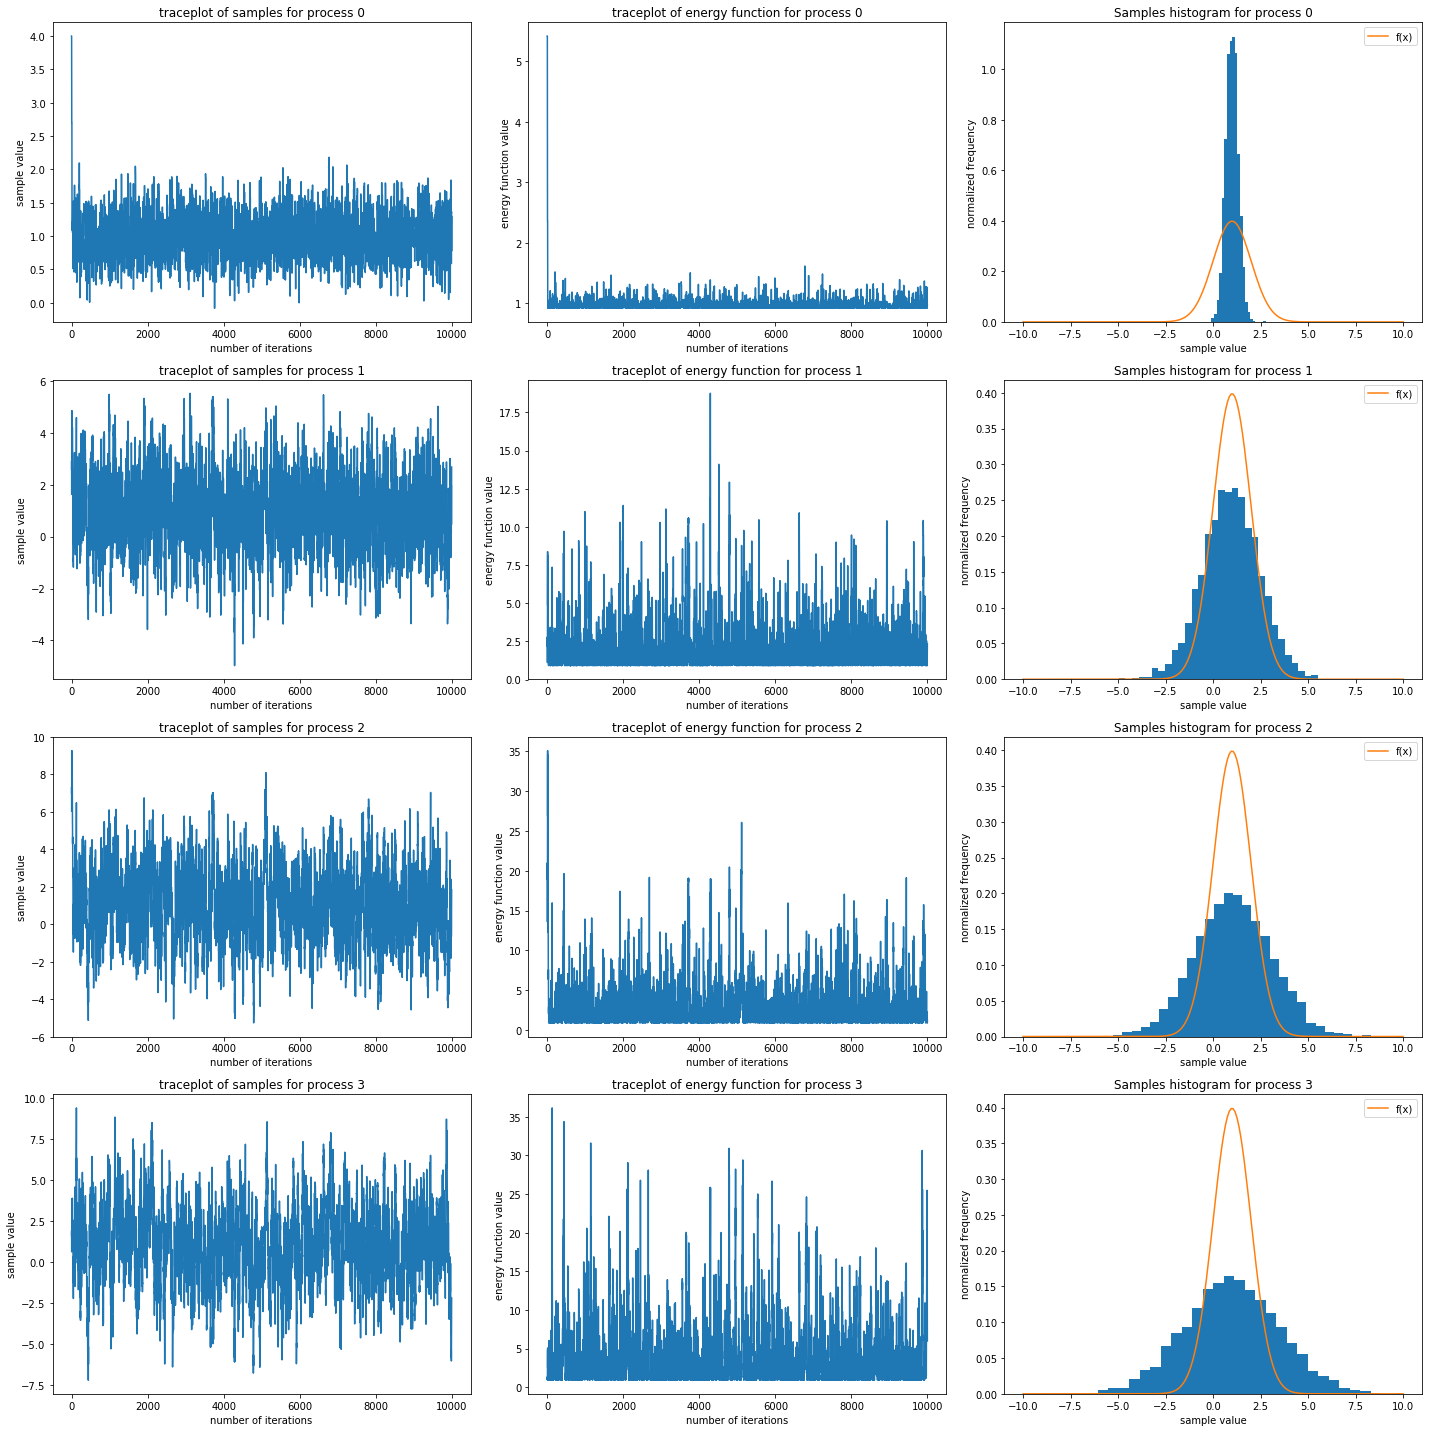

In [38]:
fig, ax = plt.subplots(nrows=num_chains, ncols=3, figsize=(20,5*num_chains))
ax = ax.ravel()

for i in range(num_chains):
    accumulator = all_results[i]
    ax[3*i+0].plot(range(num_epochs), accumulator[:,0])
    ax[3*i+0].set_title(f'traceplot of samples for process {i}')
    ax[3*i+0].set_ylabel('sample value')
    ax[3*i+0].set_xlabel('number of iterations')

    ax[3*i+1].plot(range(num_epochs), accumulator[:,1])
    ax[3*i+1].set_title(f'traceplot of energy function for process {i}')
    ax[3*i+1].set_ylabel('energy function value')
    ax[3*i+1].set_xlabel('number of iterations')

    ax[3*i+2].hist(accumulator[:,0], bins=30, density=True)
    xgrid = np.linspace(-10,10,200)
    ax[3*i+2].plot(xgrid, f(xgrid), label='f(x)')
    ax[3*i+2].set_title(f'Samples histogram for process {i}')
    ax[3*i+2].set_ylabel('normalized frequency')
    ax[3*i+2].set_xlabel('sample value')
    ax[3*i+2].legend()
fig.tight_layout()

---

In [40]:
all_results.shape

(4, 10000, 2)

In [45]:
all_r = all_results.reshape(-1,2)

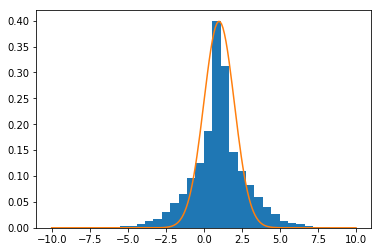

In [50]:
plt.hist(all_r[:,0],density=True, bins=30)
plt.plot(xgrid, f(xgrid), label='f(x)')
plt.show()